In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline


In [2]:
df = pd.read_csv("Travel.csv")
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


Data cleaning 
handling missing data 

In [3]:
df.isnull().sum()


CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [4]:
df.shape

(4888, 20)

In [5]:
# check all the categories 
df['Gender'].value_counts()

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

In [6]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64

In [7]:
df['Gender']=df['Gender'].replace('Fe Male','Female')
df['MaritalStatus']= df['MaritalStatus'].replace('Single','Unmarried')

In [8]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [9]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Unmarried    1598
Divorced      950
Name: count, dtype: int64

# checking Missing Value


In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [11]:
print(df.isnull().sum())

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64


Column	Missing Count	Type of Data	What to do
Age	226	Numeric	Fill with mean or median
TypeofContact	25	Categorical	Fill with most frequent (mode)
DurationOfPitch	251	Numeric	Fill with median (because it’s a range-type data)
NumberOfFollowups	45	Numeric	Fill with median
PreferredPropertyStar	26	Numeric (1–5)	Fill with mode
NumberOfTrips	140	Numeric	Fill with median
NumberOfChildrenVisiting	66	Numeric	Fill with median

In [12]:
# Fill numeric columns with median
num_cols = ['Age', 'DurationOfPitch', 'NumberOfFollowups',
            'NumberOfTrips', 'NumberOfChildrenVisiting', 'MonthlyIncome']
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

In [13]:
# Fill categorical columns with mode
cat_cols = ['TypeofContact', 'PreferredPropertyStar']
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [14]:
print(df.isnull().sum())


CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64


In [15]:
df.drop('CustomerID', axis=1, inplace=True)


In [16]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [17]:
df.dtypes


ProdTaken                     int64
Age                         float64
TypeofContact                object
CityTier                      int64
DurationOfPitch             float64
Occupation                   object
Gender                       object
NumberOfPersonVisiting        int64
NumberOfFollowups           float64
ProductPitched               object
PreferredPropertyStar       float64
MaritalStatus                object
NumberOfTrips               float64
Passport                      int64
PitchSatisfactionScore        int64
OwnCar                        int64
NumberOfChildrenVisiting    float64
Designation                  object
MonthlyIncome               float64
dtype: object

We’ll convert them into numbers using LabelEncoder:

In [18]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
cat_cols = ['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation']

for col in cat_cols:
    df[col] = le.fit_transform(df[col])


In [19]:
df.dtypes

ProdTaken                     int64
Age                         float64
TypeofContact                 int64
CityTier                      int64
DurationOfPitch             float64
Occupation                    int64
Gender                        int64
NumberOfPersonVisiting        int64
NumberOfFollowups           float64
ProductPitched                int64
PreferredPropertyStar       float64
MaritalStatus                 int64
NumberOfTrips               float64
Passport                      int64
PitchSatisfactionScore        int64
OwnCar                        int64
NumberOfChildrenVisiting    float64
Designation                   int64
MonthlyIncome               float64
dtype: object

Scaling ensures all numbers are on a similar range (important for ML).

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols = ['Age', 'DurationOfPitch', 'NumberOfFollowups', 'PreferredPropertyStar',
            'NumberOfTrips', 'NumberOfChildrenVisiting', 'MonthlyIncome']

df[num_cols] = scaler.fit_transform(df[num_cols])


🎯 Step 3: Split data into features and target

Here, ProdTaken is your target (the output variable).

In [21]:
X = df.drop('ProdTaken', axis=1)
y = df['ProdTaken']


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# decision tree 
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
print("Decision Tree Accuracy ",tree.score(X_test,y_test))
# tree.score(X_test,y_test)

forest = RandomForestClassifier()
forest.fit(X_train,y_train)
print("Random Forest Acciracy :",forest.score(X_test,y_test))



Decision Tree Accuracy  0.6073619631901841
Random Forest Acciracy : 0.8057259713701431


In [23]:
from sklearn.ensemble import RandomForestClassifier

# Create model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train model
model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [24]:
y_pred = model.predict(X_test)


In [25]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))



Accuracy: 0.9243353783231084

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.95       787
           1       0.95      0.65      0.77       191

    accuracy                           0.92       978
   macro avg       0.93      0.82      0.86       978
weighted avg       0.93      0.92      0.92       978


Confusion Matrix:
 [[780   7]
 [ 67 124]]


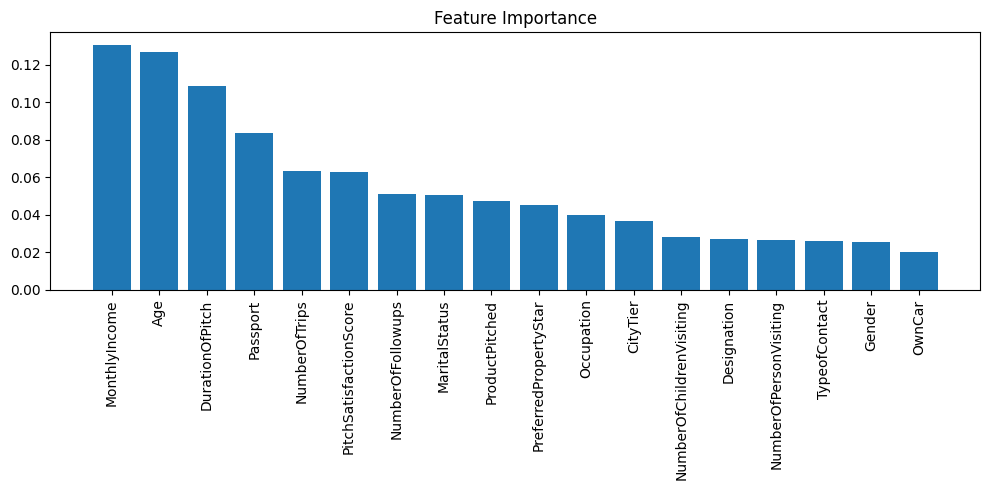

In [26]:

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,5))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()

In [27]:
df['TotalVisitors'] = df['NumberOfPersonVisiting'] + df['NumberOfChildrenVisiting']


In [28]:
df['TotalVisitors'].fillna(0, inplace=True)


In [29]:
df.drop(['NumberOfPersonVisiting', 'NumberOfChildrenVisiting'], axis=1, inplace=True)


In [30]:
df[['TotalVisitors']].head()


,TotalVisitors
0,1.609847
1,3.956616
2,1.609847
3,1.783231
4,0.609847


In [31]:
## get all the numeric feature 
num_feature = [feature for feature in df.columns if df[feature].dtype != 'o']
print('Num of Numerical Feature:', len(num_feature))

Num of Numerical Feature: 18


In [32]:
# categorical feature 

cat_features = [feature for feature in df.columns if df[feature].dtype  == 'o']
print('Num of Categorical Feature ', len(cat_features))

Num of Categorical Feature  0


In [33]:
df

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisitors
0,1,0.379261,1,3,-1.125986,2,0,-0.712434,1,-0.725222,2,-1.223399,1,2,1,2,-0.488115,1.609847
1,0,1.258009,0,1,-0.163906,2,1,0.289401,1,0.529604,0,-0.674727,0,3,1,2,-0.652267,3.956616
2,1,-0.060113,1,1,-0.885466,0,1,0.289401,0,-0.725222,2,2.068633,1,3,0,1,-1.230508,1.609847
3,0,-0.499487,0,1,-0.765206,2,0,-0.712434,0,-0.725222,0,-0.674727,1,5,1,1,-1.074725,1.783231
4,0,-0.169956,1,1,-0.885466,3,1,-0.712434,0,0.529604,0,-1.223399,0,5,1,1,-0.968397,0.609847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,1,1.258009,1,3,-0.765206,3,1,1.291235,1,0.529604,2,-0.674727,1,1,1,2,0.573832,2.783231
4884,1,-1.048704,0,1,1.880514,2,1,1.291235,0,-0.725222,2,-0.126055,1,3,1,1,-0.446459,4.956616
4885,1,1.587539,1,3,0.196874,2,0,0.289401,3,0.529604,1,2.068633,0,1,1,3,1.571297,6.130000
4886,1,-2.037295,1,3,0.076614,3,1,0.289401,0,-0.725222,2,-0.126055,0,5,0,1,-0.622023,3.956616


In [34]:
y.value_counts()

ProdTaken
0    3968
1     920
Name: count, dtype: int64

In [35]:
# create column Transformer with 3 types of transformer 
cat_features = X.select_dtypes(include='object').columns
num_feature = X.select_dtypes(exclude='object').columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    [
        ("OneHoEncoder",oh_transformer,cat_features),
        ("StandardScaler",numeric_transformer,num_feature)
    ]
)

In [36]:
preprocessor

,transformers,"[('OneHoEncoder', ...), ('StandardScaler', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,categories,'auto'
,drop,'first'
,sparse_output,True


In [37]:
 # applying Transformation in training(fit_transform)

X_train = preprocessor.fit_transform(X_train)

In [38]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-0.157926,0.640332,-0.721400,-1.020350,1.040305,0.809121,-1.252472,1.284279,-0.929922,-0.725271,1.220738,-0.127737,-0.632399,0.679690,0.782966,-0.218050,-0.765545,-0.382245
1,0.508072,0.640332,-0.721400,0.690023,-0.544883,0.809121,0.129347,0.282777,-0.929922,-0.725271,-0.189332,1.511598,-0.632399,0.679690,0.782966,0.956297,-0.765545,-0.459799
2,1.396069,0.640332,-0.721400,-1.020350,-2.130070,-1.235910,0.129347,0.282777,-0.929922,1.771041,-1.599401,0.418708,-0.632399,0.679690,0.782966,-0.218050,-0.765545,-0.245196
3,0.064073,0.640332,-0.721400,-1.020350,-0.544883,0.809121,0.129347,1.284279,-0.143591,-0.725271,-0.189332,-0.127737,-0.632399,1.408395,-1.277194,-0.218050,0.284729,0.213475
4,0.730071,-1.561690,-0.721400,2.400396,1.040305,-1.235910,1.511165,-1.720227,-0.929922,-0.725271,1.220738,1.511598,-0.632399,-0.049015,-1.277194,2.130645,-0.765545,-0.024889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,-1.045924,0.640332,-0.721400,-0.653841,1.040305,0.809121,0.129347,1.284279,-0.929922,-0.725271,1.220738,-0.674182,-0.632399,-1.506426,0.782966,0.956297,-0.765545,-0.536973
3906,0.397072,0.640332,1.455047,-0.898180,-0.544883,-1.235910,0.129347,-0.718725,2.215403,1.771041,-1.599401,-1.220627,-0.632399,1.408395,0.782966,-0.218050,-1.815819,1.529609
3907,0.064073,-1.561690,1.455047,1.545210,1.040305,-1.235910,0.129347,0.282777,-0.929922,-0.725271,-1.599401,2.058043,-0.632399,-0.777720,0.782966,0.956297,-0.765545,-0.360576
3908,-1.045924,0.640332,1.455047,1.789549,1.040305,-1.235910,0.129347,1.284279,-0.143591,-0.725271,-0.189332,-0.127737,-0.632399,-1.506426,0.782966,0.956297,0.284729,-0.252799


#Random forest classifier traine 

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,\
                            precision_score,recall_score,f1_score,roc_auc_score,roc_curve


In [40]:
models={
    "Random Forest": RandomForestClassifier()
}
for i in range(len(list(models))):
    model =list(models.values())[i]
    model.fit(X_train,y_train)# Train model 

    # make prediction 
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance 

    model_train_accuracy = accuracy_score(y_train,y_train_pred)
    model_train_f1 = f1_score(y_train,y_train_pred,average='weighted')